In [398]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [399]:
df = pd.read_csv('fcc-forum-pageviews.csv', index_col=0, parse_dates=True)
df


,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933
...,...
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918


In [400]:
df_clean = df[df['value'].between(df['value'].quantile(0.025), df['value'].quantile(0.975), inclusive='both')].copy()
df_clean

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


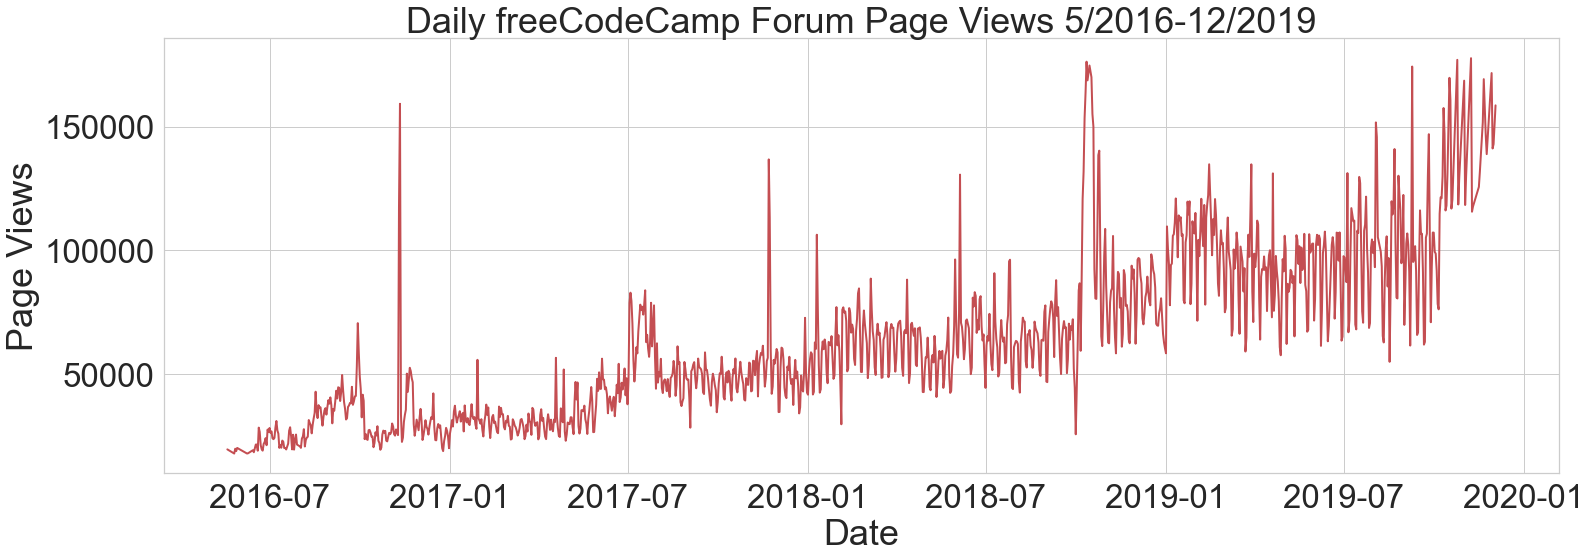

In [442]:
x_axis = df_clean.index
y_axis = df_clean.value
fig, ax = plt.subplots(figsize=(25,8))
plt.plot(x_axis, y_axis, 'r', lw=2)
plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
plt.xlabel('Date')
plt.ylabel('Page Views')
plt.show()


In [402]:
fig.savefig('line_plot.png')


In [403]:
df_clean['month'] = df_clean.index.strftime('%B')
df_clean['year'] = df_clean.index.strftime('%Y')
df_clean

,value,month,year
date,,,
2016-05-19,19736,May,2016
2016-05-26,18060,May,2016
2016-05-27,19997,May,2016
2016-05-28,19044,May,2016
2016-05-29,20325,May,2016
...,...,...,...
2019-11-24,138875,November,2019
2019-11-29,171584,November,2019
2019-11-30,141161,November,2019


In [404]:
table = pd.pivot_table(df_clean, index=['year', 'month'], values='value')
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
table = table.reindex(months_order, level='month')
table

value
year month                   
2016 May         19432.400000
     June        21875.105263
     July        24109.678571
     August      31049.193548
     September   41476.866667
     October     27398.322581
     November    40448.633333
     December    27832.419355
2017 January     32785.161290
     February    31113.071429
     March       29369.096774
     April       30878.733333
     May         34244.290323
     June        43577.500000
     July        65806.838710
     August      47712.451613
     September   47376.800000
     October     47438.709677
     November    57701.566667
     December    48420.580645
2018 January     58580.096774
     February    65679.000000
     March       62693.774194
     April       62350.833333
     May         56562.870968
     June        70117.000000
     July        63591.064516
     August      62831.612903
     September   65941.733333
     October    111378.142857
     November    78688.333333
     December    80047.483871
2019 January    102056.516129
     February   105968.357143
     March       91214.483871
     April       89368.433333
     May         91439.903226
     June        90435.642857
     July        97236.566667
     August     102717.310345
     September   97268.833333
     October    122802.272727
     November   143166.428571
     December   150733.500000

In [405]:
table.reset_index(inplace=True)
table

,year,month,value
0,2016,May,19432.400000
1,2016,June,21875.105263
2,2016,July,24109.678571
3,2016,August,31049.193548
4,2016,September,41476.866667
5,2016,October,27398.322581
6,2016,November,40448.633333
7,2016,December,27832.419355
8,2017,January,32785.161290
9,2017,February,31113.071429


(array([0, 1, 2, 3]),
 [Text(0, 0, '2016'),
  Text(1, 0, '2017'),
  Text(2, 0, '2018'),
  Text(3, 0, '2019')])

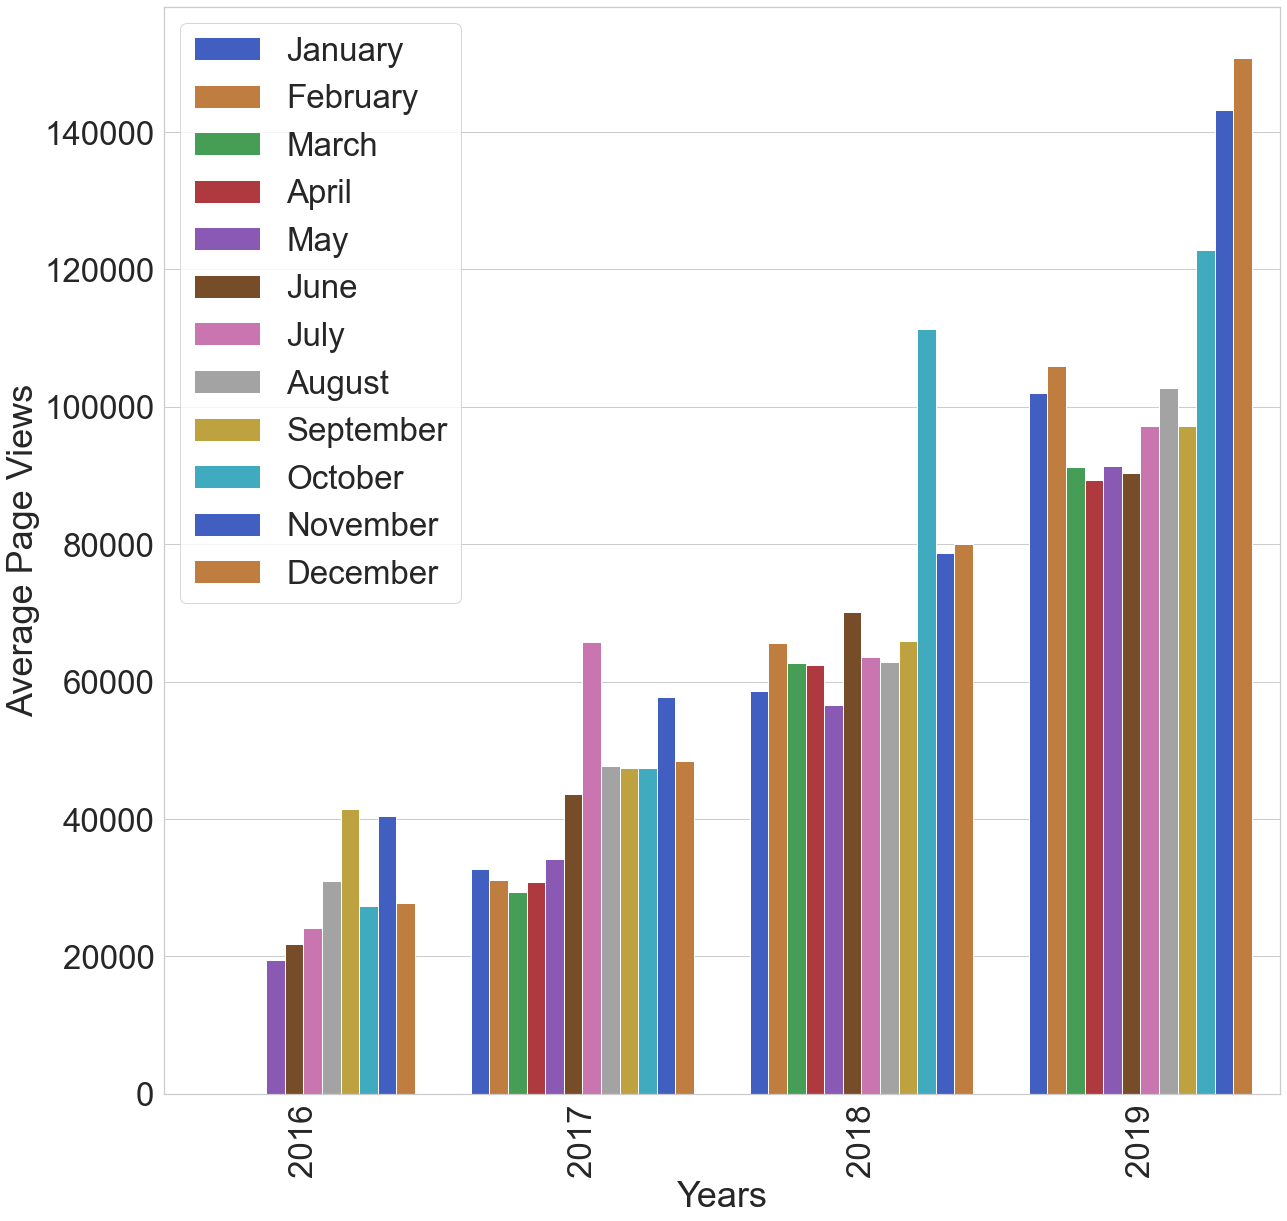

In [406]:
fig, ax = plt.subplots(figsize=(20,20))
bar_chart = sns.barplot(data=table, x='year', y='value', hue='month', hue_order=months_order, palette='bright', saturation=0.5)
plt.xlabel('Years')
plt.ylabel('Average Page Views')
plt.legend(loc='upper left')
sns.set(style='whitegrid', font_scale=3)
plt.xticks(rotation=90)

In [407]:
fig.savefig('bar_plot.png')

In [432]:
df_clean['month'] = df_clean['month'].str.slice(stop=3)
months_order_sliced = []
for month in months_order:
    months_order_sliced.append(month[0:3])
months_order_sliced

['Jan',
 'Feb',
 'Mar',
 'Apr',
 'May',
 'Jun',
 'Jul',
 'Aug',
 'Sep',
 'Oct',
 'Nov',
 'Dec']

Text(0, 0.5, 'Page Views')

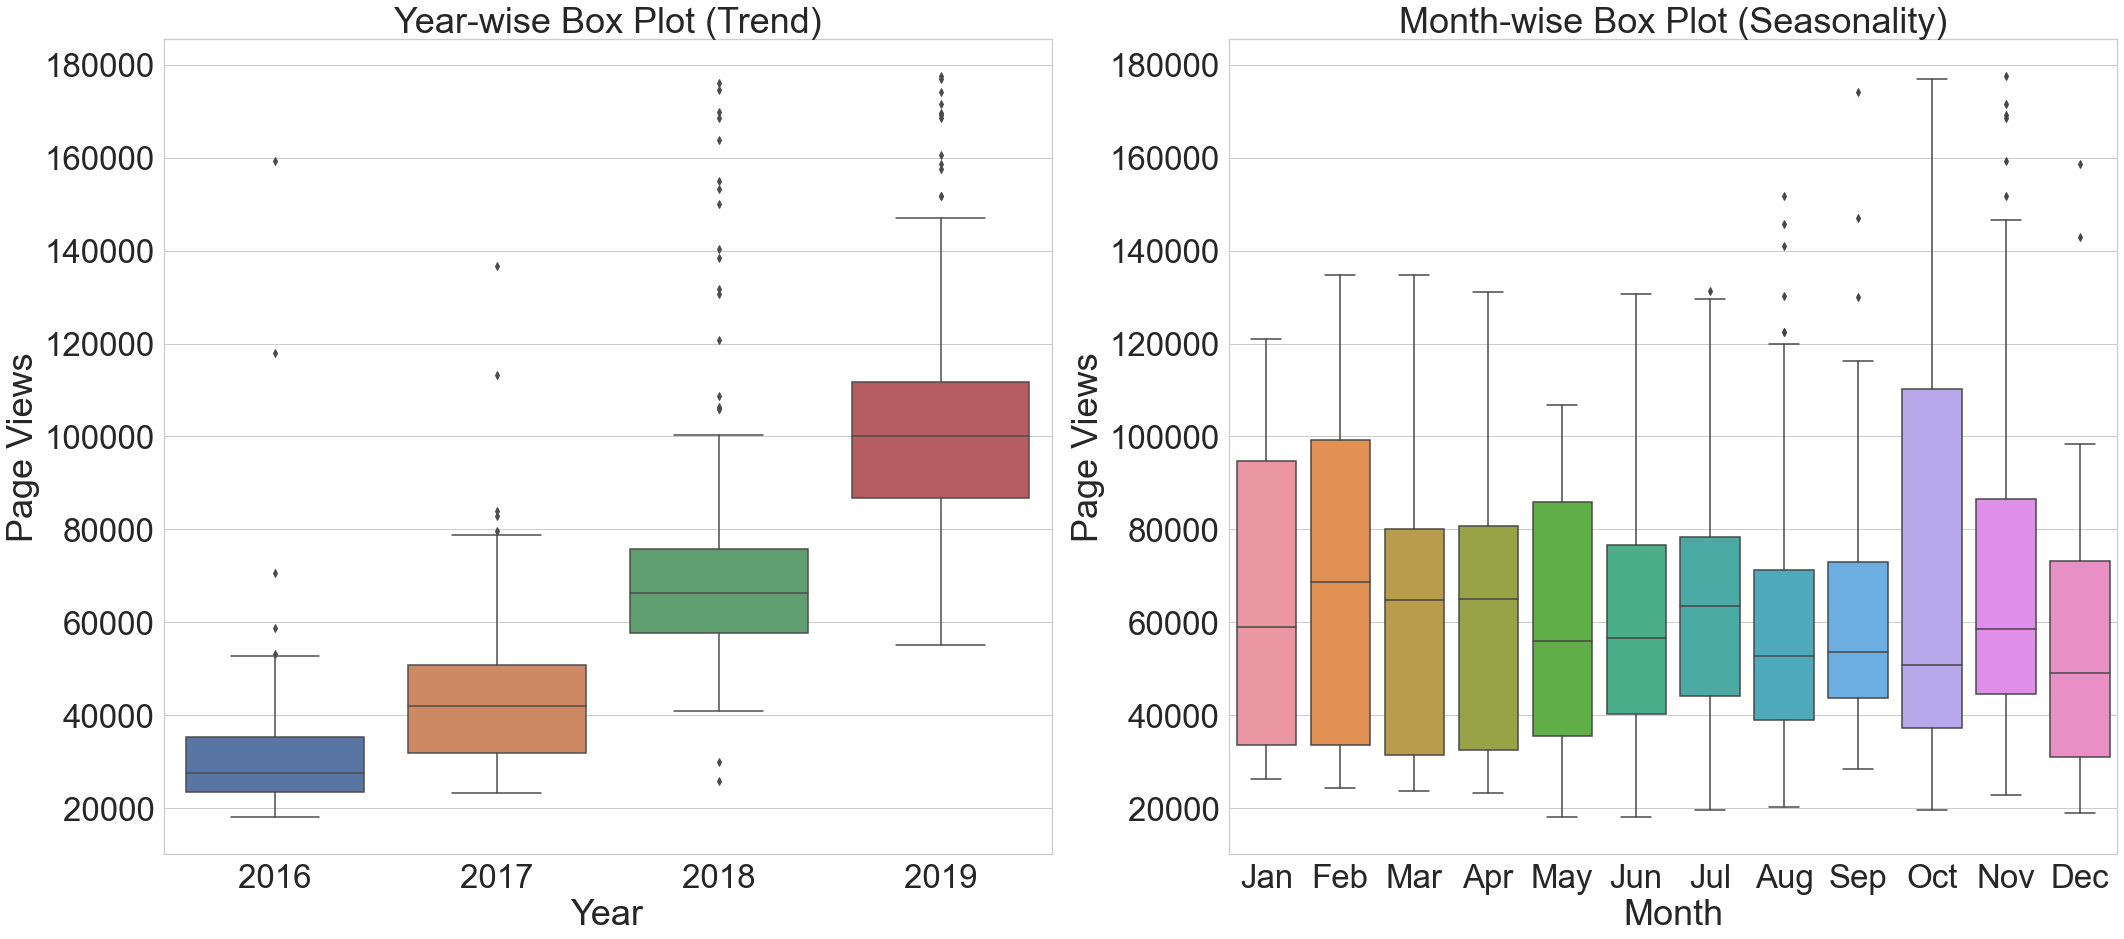

In [446]:
fig = plt.figure(figsize=(35,15))
plt.subplot(1, 2, 1)
plt.title('Year-wise Box Plot (Trend)')
sns.boxplot(data=df_clean, x='year', y='value' )
plt.xlabel('Year')
plt.ylabel('Page Views')


plt.subplot(1, 2, 2)
plt.title('Month-wise Box Plot (Seasonality)')
sns.boxplot(data=df_clean, x='month', y='value', order=months_order_sliced)
plt.xlabel('Month')
plt.ylabel('Page Views')


In [447]:
fig.savefig('box_plot.png')